# Pandas Filtering Lanjutan

Pada notebook ini, kita akan mempelajari teknik-teknik filtering lanjutan menggunakan pandas. Filtering adalah salah satu operasi paling penting dalam analisis data untuk memilih subset data berdasarkan kondisi tertentu.

## Tujuan Pembelajaran

Setelah mempelajari notebook ini, Anda akan dapat:
1. Memahami berbagai metode filtering kompleks di pandas
2. Menggunakan operator logika untuk filtering
3. Melakukan filtering dengan multiple conditions
4. Menggunakan fungsi dan method pandas untuk filtering lanjutan
5. Mengoptimalkan performa filtering

## Persiapan Dataset

Mari kita buat dataset yang akan digunakan untuk pembelajaran:

In [57]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed untuk reprodusibilitas
np.random.seed(42)

# Buat dataset penjualan
n_records = 1000

# Generate data
data = {
    'Tanggal': pd.date_range(start='2024-01-01', periods=n_records),
    'Produk': np.random.choice(['Laptop', 'Smartphone', 'Tablet', 'Smartwatch'], n_records),
    'Kategori': np.random.choice(['Elektronik', 'Gadget'], n_records),
    'Harga': np.random.normal(8000000, 2000000, n_records),
    'Jumlah': np.random.randint(1, 10, n_records),
    'Kota': np.random.choice(['Jakarta', 'Surabaya', 'Bandung', 'Medan', 'Makassar'], n_records),
    'Rating': np.random.uniform(1, 5, n_records),
    'Customer_ID': [f'CUST_{i:04d}' for i in range(1, n_records + 1)]
}

# Buat DataFrame
df = pd.DataFrame(data)

# Hitung total penjualan
df['Total'] = df['Harga'] * df['Jumlah']

# Tampilkan beberapa baris pertama
print("Dataset Penjualan:")
print(df.head())

# Informasi dataset
print("\nInformasi Dataset:")
print(df.info())

Dataset Penjualan:
     Tanggal      Produk    Kategori         Harga  Jumlah      Kota  \
0 2024-01-01      Tablet      Gadget  8.355402e+06       1  Makassar   
1 2024-01-02  Smartwatch  Elektronik  5.329311e+06       9  Surabaya   
2 2024-01-03      Laptop  Elektronik  8.760396e+06       1   Bandung   
3 2024-01-04      Tablet  Elektronik  9.221171e+06       3   Bandung   
4 2024-01-05      Tablet  Elektronik  9.119581e+06       8     Medan   

     Rating Customer_ID         Total  
0  2.970142   CUST_0001  8.355402e+06  
1  2.768428   CUST_0002  4.796380e+07  
2  2.337605   CUST_0003  8.760396e+06  
3  2.578289   CUST_0004  2.766351e+07  
4  3.119762   CUST_0005  7.295665e+07  

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tanggal      1000 non-null   datetime64[ns]
 1   Produk       1000 non-null   ob

## 1. Filtering dengan Multiple Conditions

### Operator Logika
- `&` (AND): Semua kondisi harus terpenuhi
- `|` (OR): Salah satu kondisi terpenuhi
- `~` (NOT): Negasi dari kondisi

Mari kita lihat beberapa contoh:

In [58]:
# 1. Filter dengan AND (&)
# Produk Laptop dengan rating > 4 di Jakarta
condition1 = (df['Produk'] == 'Laptop')
condition2 = (df['Rating'] > 4)
condition3 = (df['Kota'] == 'Jakarta')

filtered_df1 = df[condition1 & condition2 & condition3]
print("Laptop dengan rating > 4 di Jakarta:")
print(filtered_df1[['Produk', 'Rating', 'Kota', 'Total']].head())

# 2. Filter dengan OR (|)
# Produk dengan harga > 9jt atau rating > 4.5
condition4 = (df['Harga'] > 9000000)
condition5 = (df['Rating'] > 4.5)

filtered_df2 = df[condition4 | condition5]
print("\nProduk dengan harga > 9jt atau rating > 4.5:")
print(filtered_df2[['Produk', 'Harga', 'Rating']].head())

# 3. Filter dengan NOT (~)
# Semua produk kecuali Laptop
filtered_df3 = df[~(df['Produk'] == 'Laptop')]
print("\nSemua produk kecuali Laptop:")
print(filtered_df3['Produk'].value_counts())

Laptop dengan rating > 4 di Jakarta:
     Produk    Rating     Kota         Total
31   Laptop  4.297402  Jakarta  4.984377e+07
62   Laptop  4.273522  Jakarta  5.754556e+06
331  Laptop  4.802131  Jakarta  2.530460e+07
352  Laptop  4.199133  Jakarta  7.859196e+07
383  Laptop  4.356586  Jakarta  9.418405e+06

Produk dengan harga > 9jt atau rating > 4.5:
        Produk         Harga    Rating
3       Tablet  9.221171e+06  2.578289
4       Tablet  9.119581e+06  3.119762
5   Smartwatch  1.016156e+07  1.645469
6       Laptop  9.667844e+06  3.287984
15      Laptop  1.010631e+07  1.226722

Semua produk kecuali Laptop:
Produk
Smartwatch    280
Tablet        232
Smartphone    230
Name: count, dtype: int64


## 2. Filtering dengan Method Pandas

Pandas menyediakan beberapa method khusus untuk filtering yang lebih kompleks:

1. `isin()`: Memfilter berdasarkan list nilai
2. `between()`: Memfilter nilai dalam rentang tertentu
3. `query()`: Memfilter menggunakan string expression
4. `where()`: Memfilter dengan kondisi dan replacement value

In [59]:
# 1. Menggunakan isin()
kota_besar = ['Jakarta', 'Surabaya']
filtered_df4 = df[df['Kota'].isin(kota_besar)]
print("Penjualan di kota-kota besar:")
print(filtered_df4['Kota'].value_counts())

# 2. Menggunakan between()
# Filter produk dengan rating antara 4 dan 4.5
filtered_df5 = df[df['Rating'].between(4, 4.5)]
print("\nProduk dengan rating 4-4.5:")
print(filtered_df5[['Produk', 'Rating']].head())

# 3. Menggunakan query()
# Filter produk Laptop atau Smartphone dengan harga > 8jt
filtered_df6 = df.query("Produk in ['Laptop', 'Smartphone'] and Harga > 8000000")
print("\nLaptop atau Smartphone dengan harga > 8jt:")
print(filtered_df6[['Produk', 'Harga']].head())

# 4. Menggunakan where()
# Ganti rating < 3 dengan NaN
df['Rating_Filtered'] = df['Rating'].where(df['Rating'] >= 3)
print("\nRating setelah filter (< 3 menjadi NaN):")
print(df[['Rating', 'Rating_Filtered']].head(10))

Penjualan di kota-kota besar:
Kota
Surabaya    197
Jakarta     190
Name: count, dtype: int64

Produk dengan rating 4-4.5:
        Produk    Rating
7       Laptop  4.221729
8       Tablet  4.040644
29  Smartwatch  4.304259
31      Laptop  4.297402
43  Smartwatch  4.175272

Laptop atau Smartphone dengan harga > 8jt:
        Produk         Harga
2       Laptop  8.760396e+06
6       Laptop  9.667844e+06
7       Laptop  8.918360e+06
15      Laptop  1.010631e+07
20  Smartphone  9.876568e+06

Rating setelah filter (< 3 menjadi NaN):
     Rating  Rating_Filtered
0  2.970142              NaN
1  2.768428              NaN
2  2.337605              NaN
3  2.578289              NaN
4  3.119762         3.119762
5  1.645469              NaN
6  3.287984         3.287984
7  4.221729         4.221729
8  4.040644         4.040644
9  1.615600              NaN


## 3. Filtering dengan String Methods

Pandas menyediakan berbagai string methods untuk filtering teks:

1. `str.contains()`: Mencari substring
2. `str.startswith()`: Mencari awalan string
3. `str.endswith()`: Mencari akhiran string
4. `str.match()`: Mencari pattern dengan regex

In [60]:
# 1. Menggunakan str.contains()
# Filter customer ID yang mengandung '00'
filtered_df7 = df[df['Customer_ID'].str.contains('00')]
print("Customer ID yang mengandung '00':")
print(filtered_df7['Customer_ID'].head())

# 2. Menggunakan str.startswith()
# Filter customer ID yang dimulai dengan 'CUST_0'
filtered_df8 = df[df['Customer_ID'].str.startswith('CUST_0')]
print("\nCustomer ID yang dimulai dengan 'CUST_0':")
print(filtered_df8['Customer_ID'].head())

# 3. Menggunakan str.endswith()
# Filter customer ID yang berakhiran '0'
filtered_df9 = df[df['Customer_ID'].str.endswith('0')]
print("\nCustomer ID yang berakhiran '0':")
print(filtered_df9['Customer_ID'].head())

# 4. Menggunakan str.match()
# Filter customer ID yang sesuai pattern (CUST_00xx)
import re
pattern = 'CUST_00\d{2}'
filtered_df10 = df[df['Customer_ID'].str.match(pattern)]
print("\nCustomer ID yang sesuai pattern (CUST_00xx):")
print(filtered_df10['Customer_ID'].head())

Customer ID yang mengandung '00':
0    CUST_0001
1    CUST_0002
2    CUST_0003
3    CUST_0004
4    CUST_0005
Name: Customer_ID, dtype: object

Customer ID yang dimulai dengan 'CUST_0':
0    CUST_0001
1    CUST_0002
2    CUST_0003
3    CUST_0004
4    CUST_0005
Name: Customer_ID, dtype: object

Customer ID yang berakhiran '0':
9     CUST_0010
19    CUST_0020
29    CUST_0030
39    CUST_0040
49    CUST_0050
Name: Customer_ID, dtype: object

Customer ID yang sesuai pattern (CUST_00xx):
0    CUST_0001
1    CUST_0002
2    CUST_0003
3    CUST_0004
4    CUST_0005
Name: Customer_ID, dtype: object


<>:22: SyntaxWarning: invalid escape sequence '\d'
<>:22: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_8756/184196462.py:22: SyntaxWarning: invalid escape sequence '\d'
  pattern = 'CUST_00\d{2}'


## 4. Filtering dengan DateTime

Pandas memiliki fitur khusus untuk filtering data temporal:

1. `dt.year`: Filter berdasarkan tahun
2. `dt.month`: Filter berdasarkan bulan
3. `dt.day`: Filter berdasarkan tanggal
4. `dt.dayofweek`: Filter berdasarkan hari dalam minggu
5. `dt.quarter`: Filter berdasarkan quarter

Penjualan di bulan Januari:
     Tanggal         Total
0 2024-01-01  8.355402e+06
1 2024-01-02  4.796380e+07
2 2024-01-03  8.760396e+06
3 2024-01-04  2.766351e+07
4 2024-01-05  7.295665e+07

Penjualan di akhir pekan:
      Tanggal         Total
5  2024-01-06  3.048468e+07
6  2024-01-07  3.867138e+07
12 2024-01-13  6.834526e+07
13 2024-01-14  2.178601e+07
19 2024-01-20  4.835707e+07

Penjualan di Q1:
     Tanggal         Total
0 2024-01-01  8.355402e+06
1 2024-01-02  4.796380e+07
2 2024-01-03  8.760396e+06
3 2024-01-04  2.766351e+07
4 2024-01-05  7.295665e+07

Total Penjualan per Bulan:
Tanggal
1     3.611865e+09
2     3.435070e+09
3     3.652112e+09
4     3.947143e+09
5     3.914689e+09
6     3.513967e+09
7     3.485882e+09
8     3.720537e+09
9     3.447049e+09
10    2.469147e+09
11    2.513553e+09
12    2.955332e+09
Name: Total, dtype: float64


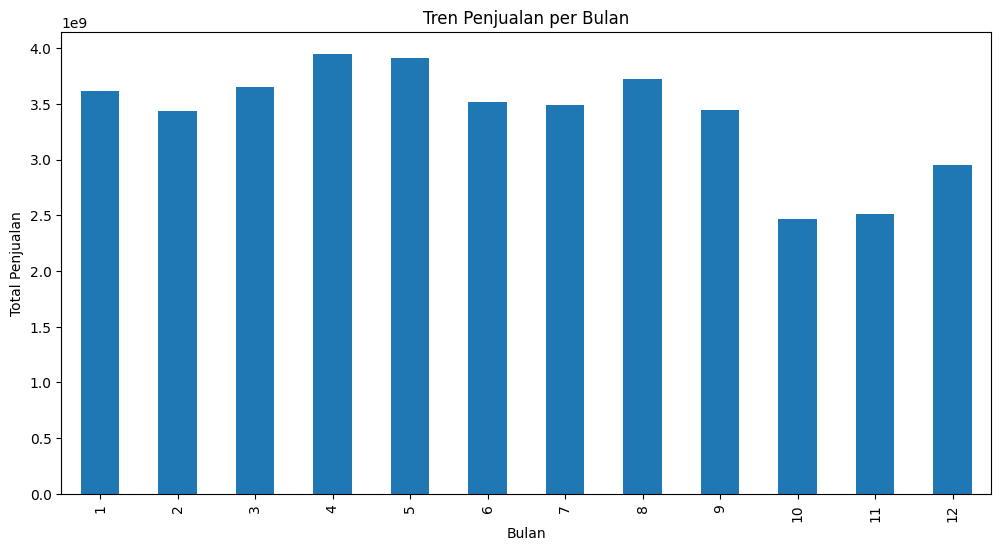

In [61]:
# Filter berdasarkan waktu
# 1. Filter berdasarkan bulan
january_sales = df[df['Tanggal'].dt.month == 1]
print("Penjualan di bulan Januari:")
print(january_sales[['Tanggal', 'Total']].head())

# 2. Filter berdasarkan hari dalam minggu (0=Senin, 6=Minggu)
weekend_sales = df[df['Tanggal'].dt.dayofweek.isin([5, 6])]
print("\nPenjualan di akhir pekan:")
print(weekend_sales[['Tanggal', 'Total']].head())

# 3. Filter berdasarkan quarter
q1_sales = df[df['Tanggal'].dt.quarter == 1]
print("\nPenjualan di Q1:")
print(q1_sales[['Tanggal', 'Total']].head())

# 4. Analisis tren penjualan per bulan
monthly_sales = df.groupby(df['Tanggal'].dt.month)['Total'].sum()
print("\nTotal Penjualan per Bulan:")
print(monthly_sales)

# Visualisasi tren penjualan
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar')
plt.title('Tren Penjualan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.show()

## 5. Optimasi Performa Filtering

Beberapa tips untuk mengoptimalkan performa filtering:

1. **Gunakan Index**
   - Index mempercepat operasi filtering
   - Cocok untuk kolom yang sering digunakan dalam filtering

2. **Gunakan query() untuk Kondisi Kompleks**
   - Lebih efisien untuk multiple conditions
   - Syntax yang lebih mudah dibaca

3. **Hindari Chaining Operations**
   - Simpan hasil intermediate dalam variabel
   - Kurangi penggunaan memori

Mari kita lihat contoh implementasinya:

In [64]:
# 1. Menggunakan Index
# Set Tanggal sebagai index
df_indexed = df.set_index('Tanggal')

# Filter dengan index
january_first_week = df_indexed['2024-01-01':'2024-01-07']
print("Penjualan minggu pertama Januari (menggunakan index):")
print(january_first_week[['Produk', 'Total']].head())

# 2. Menggunakan query() untuk kondisi kompleks
# Filter: Laptop atau Smartphone dengan harga > 8jt dan rating > 4
complex_filter = df.query(
    "Produk in ['Laptop', 'Smartphone'] and Harga > 8000000 and Rating > 4"
)
print("\nHasil filter kompleks menggunakan query():")
print(complex_filter[['Produk', 'Harga', 'Rating']].head())

# 3. Perbandingan performa
import time

# Metode 1: Filtering biasa
start_time = time.time()
result1 = df[
    (df['Produk'].isin(['Laptop', 'Smartphone'])) & 
    (df['Harga'] > 8000000) & 
    (df['Rating'] > 4)
]
time1 = time.time() - start_time

# Metode 2: Menggunakan query()
start_time = time.time()
result2 = df.query(
    "Produk in ['Laptop', 'Smartphone'] and Harga > 8000000 and Rating > 4"
)
time2 = time.time() - start_time

print("\nPerbandingan Performa:")
print(f"Waktu eksekusi filtering biasa: {time1:.6f} detik")
print(f"Waktu eksekusi query(): {time2:.6f} detik")

Penjualan minggu pertama Januari (menggunakan index):
                Produk         Total
Tanggal                             
2024-01-01      Tablet  8.355402e+06
2024-01-02  Smartwatch  4.796380e+07
2024-01-03      Laptop  8.760396e+06
2024-01-04      Tablet  2.766351e+07
2024-01-05      Tablet  7.295665e+07

Hasil filter kompleks menggunakan query():
        Produk         Harga    Rating
7       Laptop  8.918360e+06  4.221729
22  Smartphone  8.192242e+06  4.544344
42  Smartphone  1.259780e+07  4.909120
65  Smartphone  8.984903e+06  4.967851
73  Smartphone  1.037803e+07  4.916606

Perbandingan Performa:
Waktu eksekusi filtering biasa: 0.001193 detik
Waktu eksekusi query(): 0.002696 detik


## Best Practices

1. **Pilih Metode yang Tepat**
   - Gunakan `query()` untuk kondisi kompleks
   - Gunakan operator boolean (`&`, `|`) untuk kondisi sederhana
   - Gunakan index untuk filtering berdasarkan waktu

2. **Optimasi Performa**
   - Set index untuk kolom yang sering digunakan dalam filtering
   - Hindari operasi chaining yang berlebihan
   - Gunakan method pandas yang sesuai (seperti `between()`, `isin()`)

3. **Maintainability**
   - Buat variabel untuk kondisi yang kompleks
   - Dokumentasikan logic filtering
   - Gunakan nama variabel yang deskriptif

## Latihan

1. Buat dataset penjualan dengan minimal 1000 baris
2. Implementasikan berbagai teknik filtering yang telah dipelajari
3. Bandingkan performa berbagai metode filtering
4. Buat visualisasi hasil filtering

## Kesimpulan

Filtering adalah operasi fundamental dalam analisis data yang memerlukan:
1. Pemahaman berbagai metode filtering
2. Kemampuan mengoptimasi performa
3. Penerapan best practices

## Referensi

1. Pandas Documentation
2. Python Data Science Handbook
3. Effective Pandas
4. High Performance Python